# Julia vs. Python: 5 Excellent Julia Features That Will Put Python To Shame
## Top 5 reasons to check out Julia
![](images/unsplash.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://unsplash.com/@harrson?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Den Harsson</a>
    </strong>
</figcaption>

### Introduction

Yes, Python is more widely used. Yes, it has more libraries. Yes, I like Python better but these don't mean the core, native language is better than Julia. 

This is like the iOS vs. Android debate. Just because more devices run on Android (many uses cases for Python) and it has much more third-party integrations (Python libraries), it doesn't mean Android (Python) is actually better than iOS (bare-bones Julia).

In fact, there are so many iOS features that Android has admired for years despite its massive user base. In this article, we will look at a few such features of Julia that I am sure Python developers would love to have.

### 1. Speed

```python
import time

import tensorflow as tf
start = time.time()
x = tf.Variable(5.0)

with tf.GradientTape() as tape:
   y = 3 * x ** 3 + 4 * x ** 2 + 6 * x + 5

   # dy_dx = 9x^2 + 8x + 6
   dy_dx = tape.gradient(y, x)

print(time.time() - start)
```

```
[OUT]: 0.003016233444213867
```

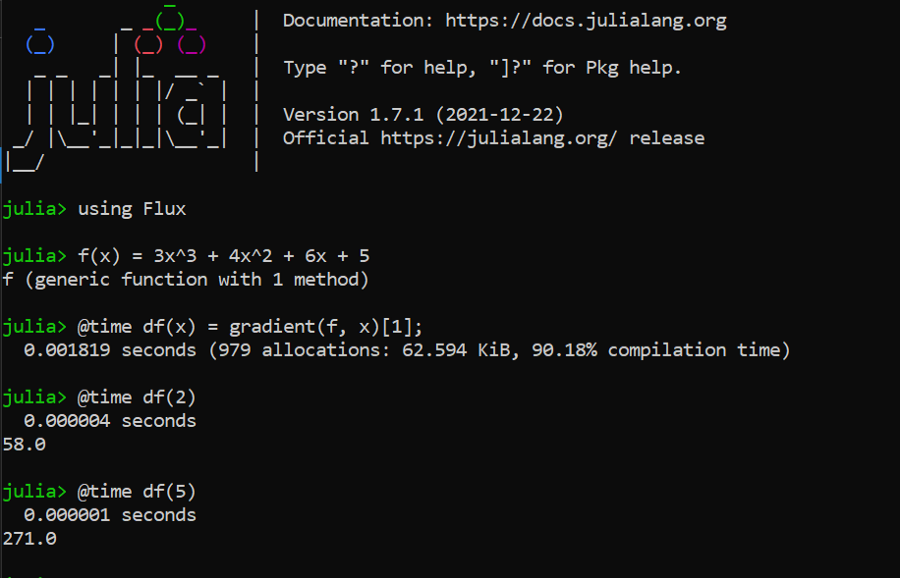

If you think it is unfair to compare deep learning libraries, let's try native Python and Julia code. We will benchmark a simple function that returns the *nth* number of the Fibonacci sequence; that'll be good enough.

In [1]:
import time

def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

I stupidly got into this comparison without knowing how much it would take Python to calculate the 100th number in Fibonacci sequence. Turns out, it takes too damn long. 

So, I tried the 40th number and it took about 21 seconds:

In [3]:
start = time.time()

print(fib(40))
print("Execution time in Python: ", time.time() - start)

102334155
Execution time in Python:  20.88260841369629


Keep in mind that I deliberately chose the slowest function to find the Fibonacci numbers so that we can see how the languages compare in the worst-case scenarios.

Now, let's try Julia.

In [1]:
using TimerOutputs

function fib(n)
    if n == 0
        return 0
    elseif n == 1
        return 1
    else
        return fib(n-1) + fib(n-2)
    end
end

@time fib(40)

  0.527796 seconds


102334155

Around 40 times faster. This is like the twisted real-life version of the tortoise and the hare tale that ends with the hare winning the race.

To be fair to Python, NumPy is actually faster than Julia for matrix manipulation but we have to keep in mind that most of NumPy is written in C.

### 2. Interoperability

The inspiration for Julia comes from many languages as stated in the Greed of Julia. This makes Julia great friends with other languages, as you can easily call languages like C, Python and R. 

Below, we are using Python's Matplotlib to plot a histogram of an array in Julia:

THE CODE TO DO THAT ABOVE

In [1]:
using PyCall

# Create a random array
a = rand(1000)

# Import Pandas
pd = pyimport("pandas")

data = Dict("name" => ["Alice", "Bob", "Charlie"],
            "age" => [25, 30, 35],
            "city" => ["New York", "Los Angeles", "Chicago"])

# Create a dataframe
pd.DataFrame(data).head()

,name,city,age
0,Alice,New York,25
1,Bob,Los Angeles,30
2,Charlie,Chicago,35


In [3]:
penguins = pd.read_csv("data/penguins.csv")

penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### 3. Math support

In [1]:
x = 73

4x^2 - 8x + x

20805

In [3]:
(x + 1)x + x

5475

__Powers, logs and roots__

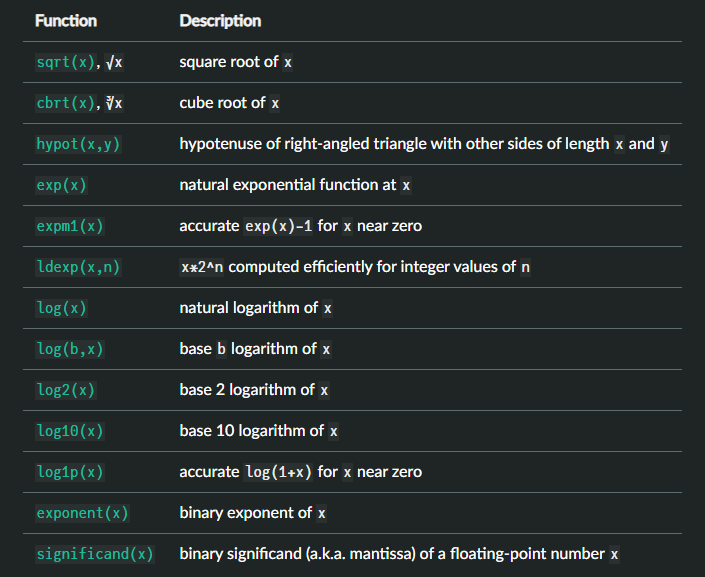

__Trigonometry__

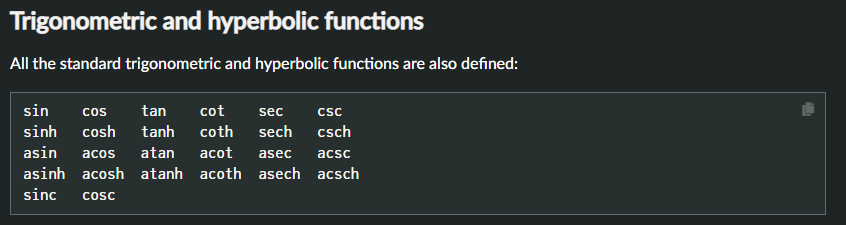

Also add `d` to trigs to calculate degrees, rather than radians.

In [7]:
array = [1, 2, 3]

array .^ 5

3-element Vector{Int64}:
   1
  32
 243

In [9]:
array .+ x

3-element Vector{Int64}:
 74
 75
 76

In [14]:
exp.(array)

3-element Vector{Float64}:
  2.718281828459045
  7.38905609893065
 20.085536923187668

In [15]:
log.(array)

3-element Vector{Float64}:
 0.0
 0.6931471805599453
 1.0986122886681098

In [16]:
using LinearAlgebra

### 4. Multiple dispatch

### 5. Command-line and shell support

### Conclusion